In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import chisquare

%matplotlib inline

In [2]:
train_data = pd.read_csv('invasion.csv')
train_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [4]:
test_data = pd.read_csv('operative_information.csv')
test_data.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [5]:
rfc = RandomForestClassifier(random_state=0)

In [6]:
X = train_data.drop({'class'}, axis=1)
y = train_data['class']

In [7]:
train_data.shape

(500, 7)

In [8]:
train_data.describe()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.514471,6.782598,225.959106,0.335078,293557.236000,81.336123
std,3.865046,2.274478,202.852757,0.189641,162370.270371,136.624929
min,0.860820,2.004911,10.865759,0.100030,137.000000,9.152254
25%,3.925305,5.036264,62.669515,0.153777,159892.000000,11.947038
50%,7.367569,7.069033,110.044266,0.333999,311942.500000,40.169555
75%,10.574544,8.675668,372.838559,0.489826,432034.750000,46.849032
max,17.089350,11.481238,695.871423,0.791757,567040.000000,496.882090


In [10]:
train_data['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [13]:
params = {'n_estimators': range(10, 101, 10),
          'max_depth': range(1, 21, 2),
          'min_samples_leaf': range(1, 11),
          'min_samples_split': range(2, 21, 2)}

In [16]:
clf = GridSearchCV(rfc, params, cv=3, n_jobs=-1)

In [17]:
clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 21, 2),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 21, 2),
                         'n_estimators': range(10, 101, 10)})

In [18]:
clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [19]:
rfc_best = RandomForestClassifier(random_state=0,
                                  max_depth=3,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=10)

In [20]:
rfc_best.fit(X, y)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [21]:
X_test = test_data

In [22]:
pred = rfc_best.predict(X_test)

In [24]:
pred = pd.DataFrame(pred)

In [26]:
pred.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

<AxesSubplot:>

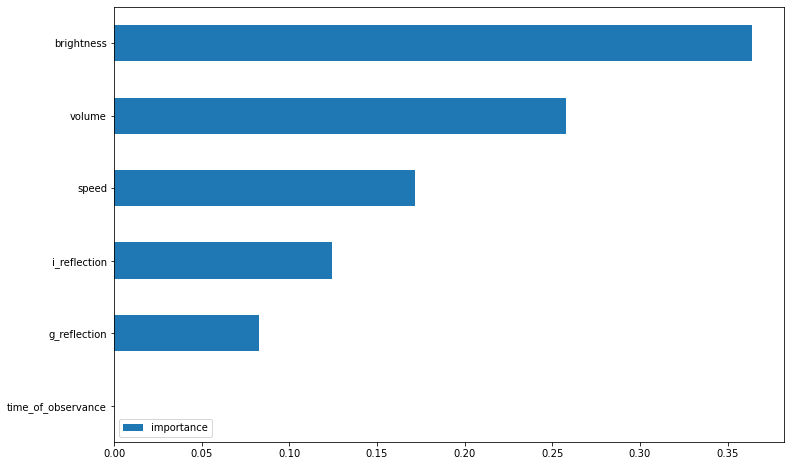

In [28]:
imp = pd.DataFrame(rfc_best.feature_importances_, index=X_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [29]:
analyze_data = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [33]:
analyze_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [34]:
corr = analyze_data.corr()

<AxesSubplot:>

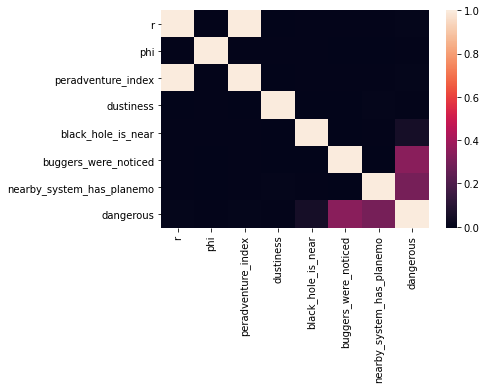

In [35]:
sns.heatmap(corr)

In [41]:
chisquare(analyze_data)

Power_divergenceResult(statistic=array([ 5.72458109e+06,  6.00581309e+06,  7.55644704e+05, -2.31220620e+08,
        8.90010000e+04,  7.00100000e+03,  9.65000000e+02,  9.79800000e+03]), pvalue=array([0., 0., 0., 1., 1., 1., 1., 1.]))

In [47]:
X_analyze = analyze_data.drop({'dangerous'}, axis=1)
y_analyze = analyze_data['dangerous']

In [43]:
rfc_analyze = RandomForestClassifier(random_state=0)

In [45]:
params_analyze = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 11, 2),
          'min_samples_leaf': range(1, 6),
          'min_samples_split': range(2, 11, 2)}

In [46]:
clf_analyze = GridSearchCV(rfc_analyze, params_analyze, cv=3, n_jobs=-1)

In [48]:
clf_analyze.fit(X_analyze, y_analyze)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 11, 2),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': range(10, 51, 10)})

In [49]:
clf_analyze.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 40}

In [50]:
rfc_analyze_best = RandomForestClassifier(random_state=0,
                                          n_estimators=40,
                                          max_depth=7,
                                          min_samples_leaf=3,
                                          min_samples_split=2)

In [51]:
rfc_analyze_best.fit(X_analyze, y_analyze)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=40,
                       random_state=0)

<AxesSubplot:>

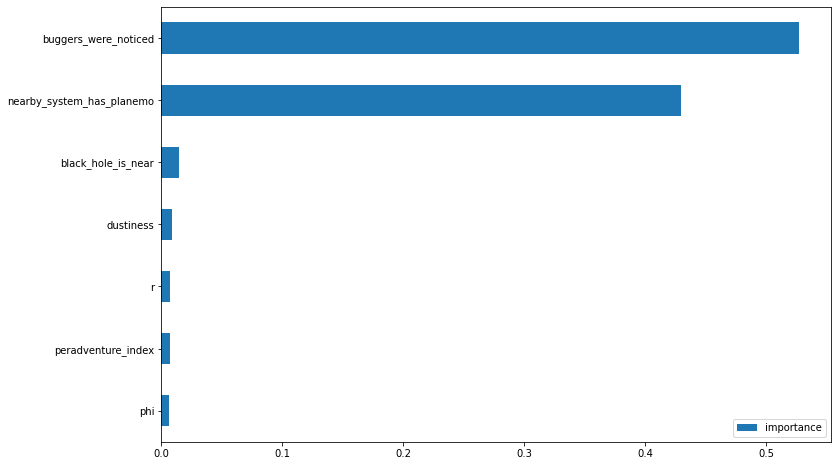

In [52]:
imp = pd.DataFrame(rfc_analyze_best.feature_importances_, index=X_analyze.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))